Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [5]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [6]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [7]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1, include_bias=True)
X_design = poly.fit_transform(X)
print(X_design)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [8]:
from numpy import linalg
# Vaš kôd ovdje

#1. koristenjem linalg
X_t = np.transpose(X_design, axes=None)
inverse_gram = np.linalg.inv(np.matmul(X_t,X_design)) #inverz gramove matrice
pseudo_byhand = np.matmul(inverse_gram, X_t) # izracun pseudoinverza
weight = np.matmul(pseudo_byhand, y) #racunanje krajnje tezine
print(f"Tezine izracunata rucno iznosi: {weight}")

# ovo je samo kobasica ovog gore
# w = np.matmul(np.matmul(np.linalg.inv((np.matmul(X_t, X))), X_t),y)

# ovdje racunamo pseudoinverz ugradenom funkcijom
pseudo_byfunc = np.linalg.pinv(X_design) # pozivom funkcije pinv
w = np.matmul(pseudo_byfunc, y) # izracun krajnje tezine 
print(f"Tezine izracunata funkcijom iznosi: {w}")

# u konacnici dobivamo jednak rezultat

Tezine izracunata rucno iznosi: [2.2        0.45714286]
Tezine izracunata funkcijom iznosi: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [9]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
y_pred = np.matmul(X_design, np.transpose(w))
print(f"Predicted values: {y_pred}")
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")


Predicted values: [2.2        2.65714286 3.11428571 4.02857143]
MSE: 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [10]:
# Vaš kôd ovdje
try:
    design_matrix_inverse = np.linalg.inv(X_design)
    # ovo baca error jer se ne moze izracunati inverz matrice
except:
    print(f"Bacam error jer ne postoji inverz matrice.")


Bacam error jer ne postoji inverz matrice.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [11]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(X_design, y)
r2_score = reg.score(X_design, y)
print(f"score: {r2_score}")

print(f"coef_: {reg.coef_}")
print(f"intercept: {reg.intercept_}")

predicted = reg.predict(X_design) # racunanje predikcije modela metodom predict
mse_pred = mean_squared_error(y, predicted)

print(f"MSE for predicted value via .predict(): {mse_pred}") 
# mse je identican kao ranije izracunati

score: 0.18285714285714272
coef_: [0.         0.45714286]
intercept: 2.2
MSE for predicted value via .predict(): 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [12]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    norm = np.random.normal(scale=noise, size=(X.shape[0],1))
    res = np.add(f(X), norm)
    return res
    

In [13]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [14]:
# Vaš kôd ovdje
def f(x):
    return (5+x-2*(x**2)-5*(x**3))

x = make_instances(-5, 5,50)
y = make_labels(x, f, 200)

print(f"Ovo su instance: {x}")
print(f"Ovo su oznake: {y}")

Ovo su instance: [[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]
Ovo su oznake: [[ 902.0640798 ]
 [ 345.04761884]
 [ 355.06010957]
 [ 247.30982666]
 [ 411.87414362]
 [ 361.96214104]
 [ 857.48939811]
 [ 199.37751427]
 [ 424.52988915]
 [ -28.63048807]
 [ 593.87016199]
 [  19.31301317]
 [ -38.341364

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

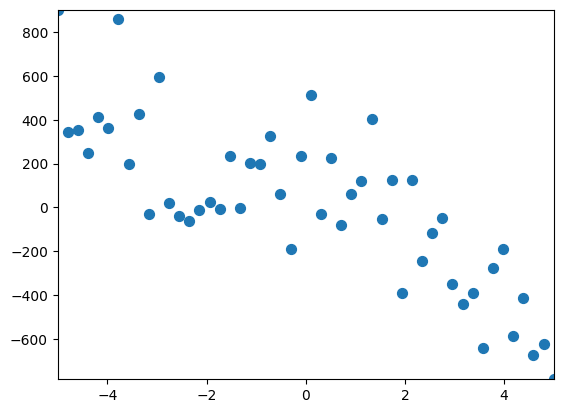

In [15]:
# Vaš kôd ovdje
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.scatter(x, y, s=50)


### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

MSE: 40562.261199296205


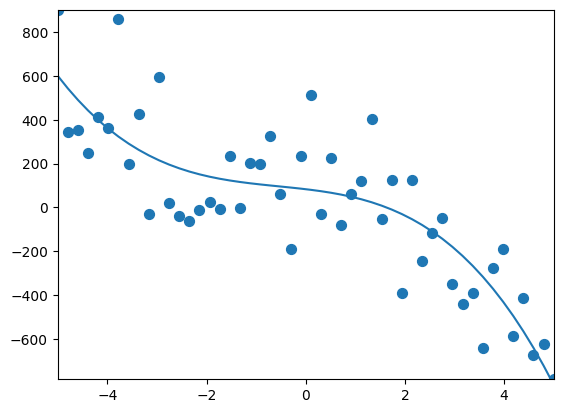

In [16]:
# Vaš kôd ovdje
x_design = PolynomialFeatures(degree=3).fit_transform(x)

pseudo_inverz = np.linalg.pinv(x_design)
w = np.matmul(pseudo_inverz, y)

y_pred = np.matmul(x_design, w)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")

plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.scatter(x, y, s=50)

plt.plot(x, y_pred)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

MSE for degree 1: 52308.5833965009
MSE for degree 3: 40562.261199296205
MSE for degree 5: 38599.09970169512
MSE for degree 10: 29639.82409330323
MSE for degree 20: 26104.41109606654


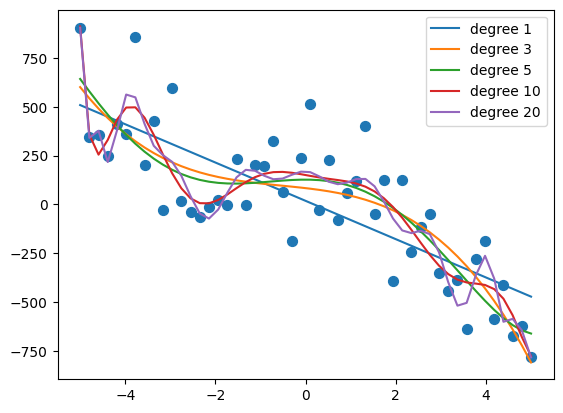

In [17]:
# Vaš kôd ovdje
plt.scatter(x, y, s=50)
degree = [1, 3, 5, 10, 20]

for d in degree:
    x_design = PolynomialFeatures(degree=d).fit_transform(x)
    pseudo_inverz = np.linalg.pinv(x_design)
    w = np.matmul(pseudo_inverz, y)

    y_pred = np.matmul(x_design, w)
    mse = mean_squared_error(y, y_pred)
    print(f"MSE for degree {d}: {mse}")
    plt.plot(x, y_pred, label=f"degree {d}")
plt.legend(loc="best")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

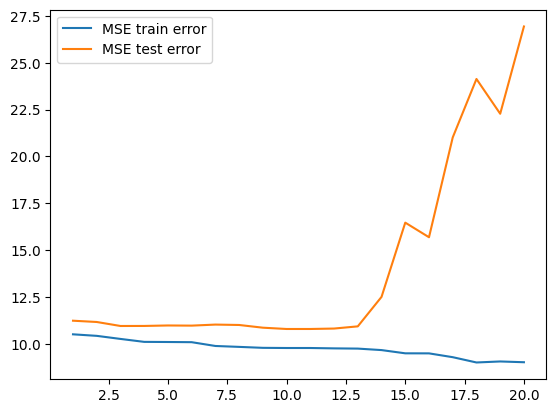

In [18]:
from sklearn.model_selection import train_test_split
train, test = [], []
# Vaš kôd ovdje
degree = [x+1 for x in range(20)]
x_train, x_test , y_train, y_test= train_test_split(x, y, test_size =0.5)

for d in degree:
    x_design = PolynomialFeatures(degree=d).fit_transform(x_train)
    pseudo_inverz = np.linalg.pinv(x_design)
    w = np.matmul(pseudo_inverz, y_train)

    y_pred = np.matmul(x_design, w)
    mse = mean_squared_error(y_train, y_pred)
    #print(f"MSE_train for degree {d}: {mse}")
    train.append(np.log(mse))

    x_design = PolynomialFeatures(degree=d).fit_transform(x_test)
    pseudo_inverz = np.linalg.pinv(x_design)

    y_pred = np.matmul(x_design, w)
    mse = mean_squared_error(y_test, y_pred)
    #print(f"MSE_test for degree {d}: {mse}")
    test.append(np.log(mse))

plt.plot(degree, train, label="MSE train error")
plt.plot(degree, test, label="MSE test error")
plt.legend(loc="best")


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

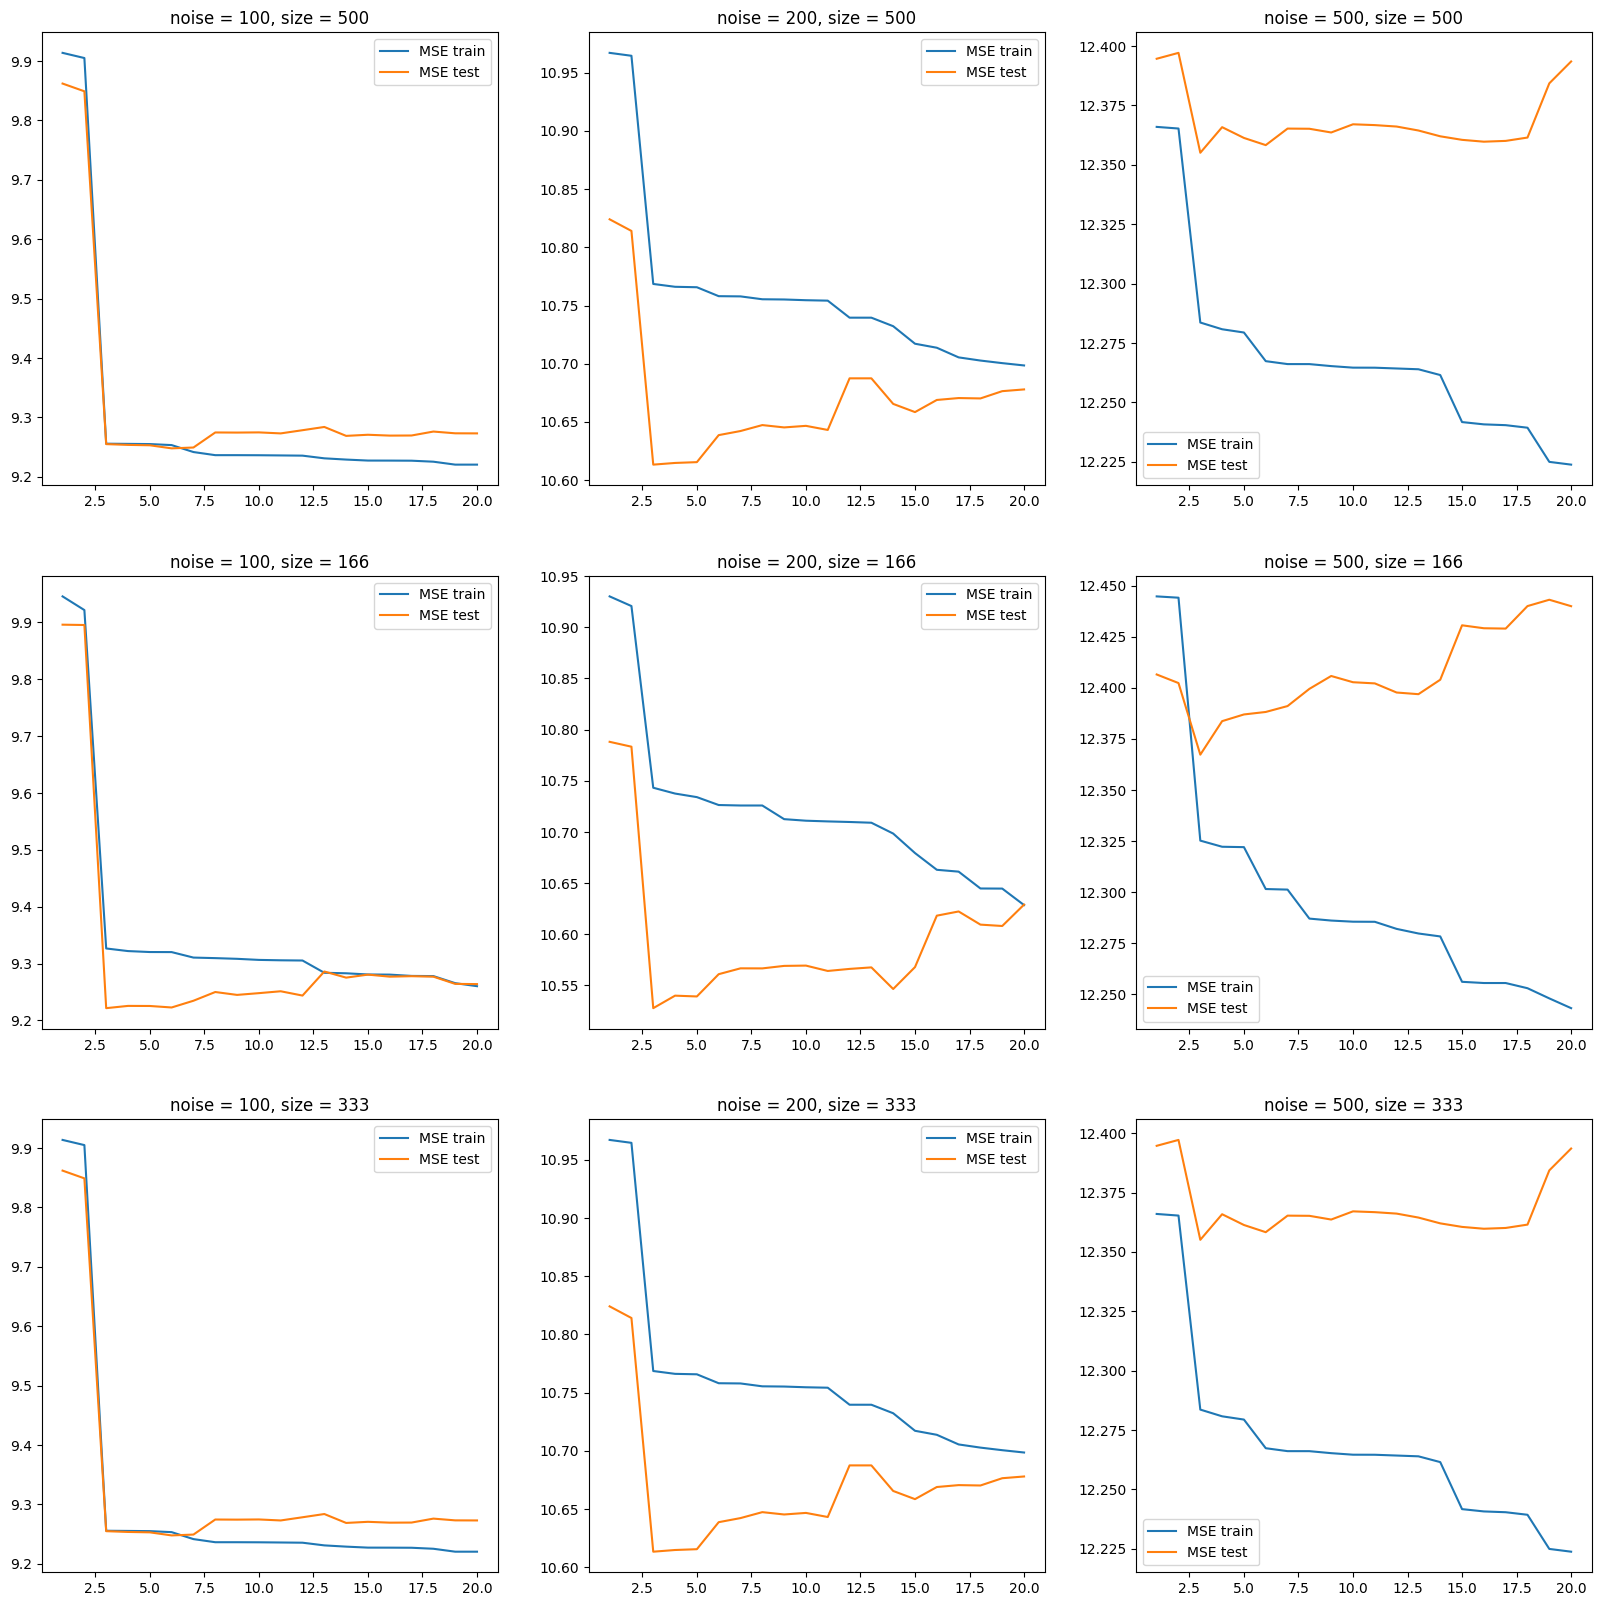

In [19]:
# Vaš kôd ovdje
def f(x):
    return (5+x-2*(x**2)-5*(x**3))

figure, axs = subplots(3,3)
figure.set_size_inches(20, 20)

noise =  [100, 200, 500]
size = [500, 500, 500, 500//3, 500//3, 500//3, 1000//3, 1000//3, 1000//3]

degree = [x+1 for x in range(20)]
x = make_instances(-5, 5, 500) # kreiramo 500 primjera
x_train, x_test = train_test_split(x, test_size =0.5)

y_train_100 = make_labels(x_train, f, 100)
y_train_200 = make_labels(x_train, f, 200)
y_train_500 = make_labels(x_train, f, 500)

y_test_100 = make_labels(x_test, f, 100)
y_test_200 = make_labels(x_test, f, 200)
y_test_500 = make_labels(x_test, f, 500)



# x_train sve
x_train_13 = x_train[0:int(500/3)]
x_train_23 = x_train[0:int(1000/3)]

# x_test sve
x_test_13 = x_test[0:int(500/3)]
x_test_23 = x_test[0:int(1000/3)]

# y_train_100 sve
y_train_100_13 = y_train_100[0:int(500/3)]
y_train_100_23 = y_train_100[0:int(1000/3)]

# y_train_200 sve
y_train_200_13 = y_train_200[0:int(500/3)]
y_train_200_23 = y_train_200[0:int(1000/3)]

# y_train_500 sve
y_train_500_13 = y_train_500[0:int(500/3)]
y_train_500_23 = y_train_500[0:int(1000/3)]

# y_test_100 sve
y_test_100_13 = y_test_100[0:int(500/3)]
y_test_100_23 = y_test_100[0:int(1000/3)]

# y_test_200 sve
y_test_200_13 = y_test_200[0:int(500/3)]
y_test_200_23 = y_test_200[0:int(1000/3)]

# y_test_500 sve
y_test_500_13 = y_test_500[0:int(500/3)]
y_test_500_23 = y_test_500[0:int(1000/3)]

arr = [(x_train, y_train_100, x_test, y_test_100),
       (x_train, y_train_200, x_test, y_test_200),
       (x_train, y_train_500, x_test, y_test_500),
       (x_train_13, y_train_100_13, x_test_13, y_test_100_13),
       (x_train_13, y_train_200_13, x_test_13, y_test_200_13),
       (x_train_13, y_train_500_13, x_test_13, y_test_500_13),
       (x_train_23, y_train_100_23, x_test_23, y_test_100_23),
       (x_train_23, y_train_200_23, x_test_23, y_test_200_23),
       (x_train_23, y_train_500_23, x_test_23, y_test_500_23),]

tr, t = [], []
for each in arr:
    train, test = [], []
    x_tr = each[0] # x za treniranje
    y_tr = each[1] # y za treniranje

    x_t = each[2] # x za testiranje
    y_t = each[3] # y za testiranje

    for d in degree:
        x_design = PolynomialFeatures(degree=d).fit_transform(x_tr)
        pseudo_inverz = np.linalg.pinv(x_design)
        w = np.matmul(pseudo_inverz, y_tr)

        y_pred = np.matmul(x_design, w)
        mse = mean_squared_error(y_tr, y_pred)
        #print(f"MSE_train for degree {d}: {mse}") ovdje zavrsava jedno treniranje
        train.append(np.log(mse))

        x_design = PolynomialFeatures(degree=d).fit_transform(x_t)
        pseudo_inverz = np.linalg.pinv(x_design)

        y_pred = np.matmul(x_design, w)
        mse = mean_squared_error(y_t, y_pred)
        #print(f"MSE_test for degree {d}: {mse}") ovdje zavrsava jedno testiranje
        test.append(np.log(mse))
    tr.append(train)
    t.append(test)

for i in range(len(tr)):
    plt.subplot(3,3,i+1)
    plt.title(f"noise = {noise[i % 3]}, size = {size[i]}")
    plt.plot(range(1,21), tr[i], label="MSE train")
    plt.plot(range(1,21), t[i], label="MSE test")
    plt.legend(loc="best")


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [21]:
# Vaš kôd ovdje

#primjeri iz prvog zadatka 
x = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

lamb = [0, 1, 10]
I = np.identity(x_design.shape[1])
I[0, 0] = 0

for lb in lamb:
    x_design = PolynomialFeatures(degree=3).fit_transform(x)
    x_t = np.transpose(x_design)
    inverse_gram = np.linalg.inv(np.matmul(x_t,x_design) + lb*I) #inverz gramove matrice
    pseudo_byhand = np.matmul(inverse_gram, x_t) # izracun pseudoinverza
    weight = np.matmul(pseudo_byhand, y) #racunanje krajnje tezine
    print(f"Tezine izracunata rucno iznosi: {weight}")


Tezine izracunata rucno iznosi: [ 4.         -5.91666667  3.375      -0.45833333]
Tezine izracunata rucno iznosi: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Tezine izracunata rucno iznosi: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
x = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

lamb = [0, 1, 10]
for lb in lamb:
    x_design = PolynomialFeatures(degree=3).fit_transform(x)
    ridge = Ridge(alpha=lb)
    ridge.fit(x_design, y)
    print(ridge.coef_, ridge.intercept_) # dobivamo iste brojeve
    print()


[ 0.         -5.91666667  3.375      -0.45833333] 4.000000000000025

[ 0.         -0.69079365 -0.2831746   0.1445805 ] 3.0569614512471652

[ 0.         -0.15897295 -0.13423067  0.0815601 ] 2.4944418431229725



### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

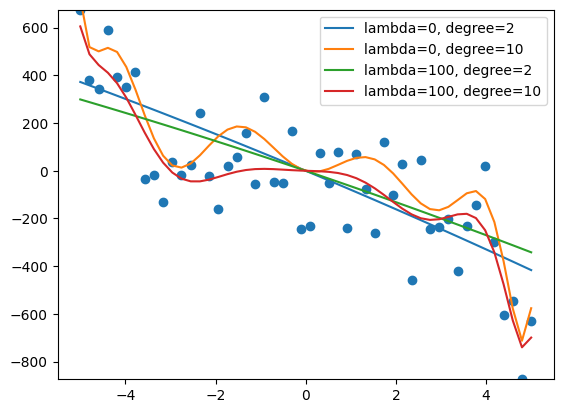

In [23]:
# Vaš kôd ovdje
def f(x):
    return (5+x-2*(x**2)-5*(x**3))

lamb = [0, 100]
degree = [2, 10]

x = make_instances(-5, 5,50)
y = make_labels(x, f, 200)

plt.scatter(x,y)
plt.ylim(min(y), max(y))

for lb in lamb:
    for d in degree:
        x_design = PolynomialFeatures(degree=d).fit_transform(x)
        ridge = Ridge(alpha= lb)
        ridge.fit(x_design, y)
        y_pred = np.matmul(x_design, np.transpose(ridge.coef_))

        plt.plot(x, y_pred, label=f"lambda={lb}, degree={d}")

plt.legend()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


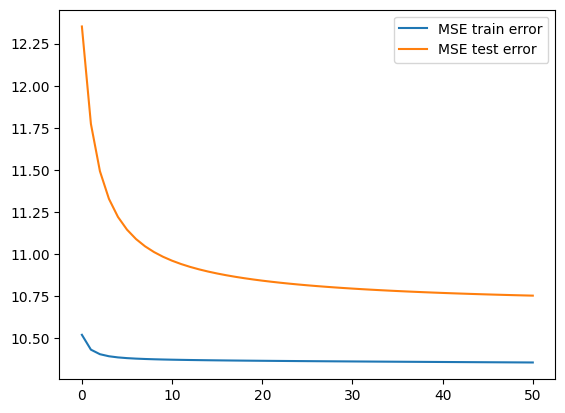

In [24]:
from sklearn.model_selection import train_test_split

def f(x):
    return (5+x-2*(x**2)-5*(x**3))

lamb = [x for x in range(0, 51)]
x = make_instances(-5, 5,50)
y = make_labels(x, f, 200)

x_train, x_test , y_train, y_test= train_test_split(x, y, test_size =0.5)

train, test = [], []
for lb in lamb:
    x_design = PolynomialFeatures(degree=10).fit_transform(x_train)
    ridge = Ridge(alpha=lb)
    ridge.fit(x_design, y_train)
    y_pred = np.matmul(x_design, np.transpose(ridge.coef_))
    mse = mean_squared_error(y_train, y_pred)
    train.append(np.log(mse))

    x_design = PolynomialFeatures(degree=10).fit_transform(x_test)
    y_pred = np.matmul(x_design, np.transpose(ridge.coef_))
    mse = mean_squared_error(y_test, y_pred)
    test.append(np.log(mse))

plt.plot(train, label=f"MSE train error")
plt.plot(test, label=f"MSE test error")

plt.legend()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [25]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

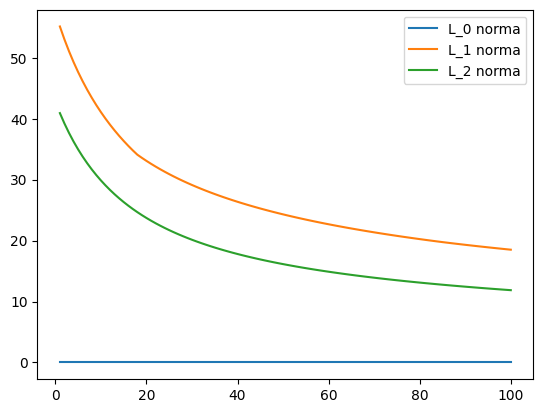

In [26]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

def f(x):
    return (5+x-2*(x**2)-5*(x**3))

def l_1_norm(weight_vector):
    sum = 0
    for each in weight_vector:
        sum += abs(each)
    return sum

def l_2_norm(weight_vector):
    sum = 0
    for each in weight_vector:
        sum += each**2
    return np.sqrt(sum)


x = make_instances(-5, 5,100)
y = make_labels(x, f, 200)

l_0, l_1, l_2 = [], [], []

train, test = [], []
x_train, x_test , y_train, y_test= train_test_split(x, y, test_size =0.5)

d = 10
lamb = [x for x in range(1, 101)]

for lb in lamb:
    x_design = PolynomialFeatures(degree=5).fit_transform(x_train)
    ridge = Ridge(alpha=lb)
    ridge.fit(x_design, y_train)
    # ridge.coef_ je vektor tezina
    tmp = nonzeroes(ridge.coef_)
    l_0.append(tmp)

    tmp =l_1_norm(ridge.coef_[0])
    l_1.append(tmp)

    tmp = l_2_norm(ridge.coef_[0])
    l_2.append(tmp)

plt.plot(lamb,l_0, label="L_0 norma")
plt.plot(lamb,l_1, label="L_1 norma")
plt.plot(lamb,l_2, label="L_2 norma")
plt.legend(loc="best")




### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

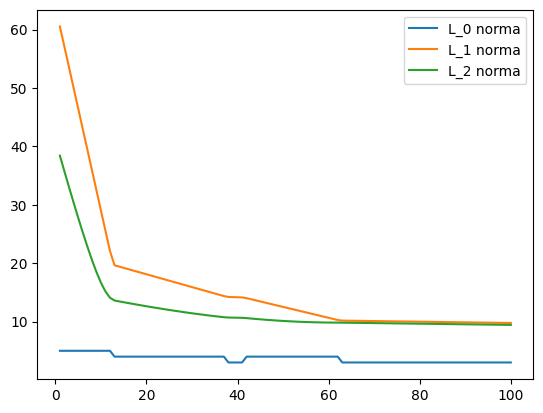

In [27]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

def f(x):
    return (5+x-2*(x**2)-5*(x**3))

def l_1_norm(weight_vector):
    sum = 0
    for each in weight_vector:
        sum += abs(each)
    return sum

def l_2_norm(weight_vector):
    sum = 0
    for each in weight_vector:
        sum += each**2
    return np.sqrt(sum)


x = make_instances(-5, 5,100)
y = make_labels(x, f, 200)

l_0, l_1, l_2 = [], [], []

train, test = [], []
x_train, x_test , y_train, y_test= train_test_split(x, y, test_size =0.5)

d = 10
lamb = [x for x in range(1, 101)]

for lb in lamb:
    x_design = PolynomialFeatures(degree=5).fit_transform(x_train)
    lasso = Lasso(alpha=lb, max_iter=10000)
    lasso.fit(x_design, y_train)
    # ridge.coef_ je vektor tezina
    tmp = nonzeroes(lasso.coef_)
    l_0.append(tmp)

    tmp =l_1_norm(lasso.coef_)
    l_1.append(tmp)

    tmp = l_2_norm(lasso.coef_)
    l_2.append(tmp)

plt.plot(lamb,l_0, label="L_0 norma")
plt.plot(lamb,l_1, label="L_1 norma")
plt.plot(lamb,l_2, label="L_2 norma")
plt.legend(loc="best")


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [28]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

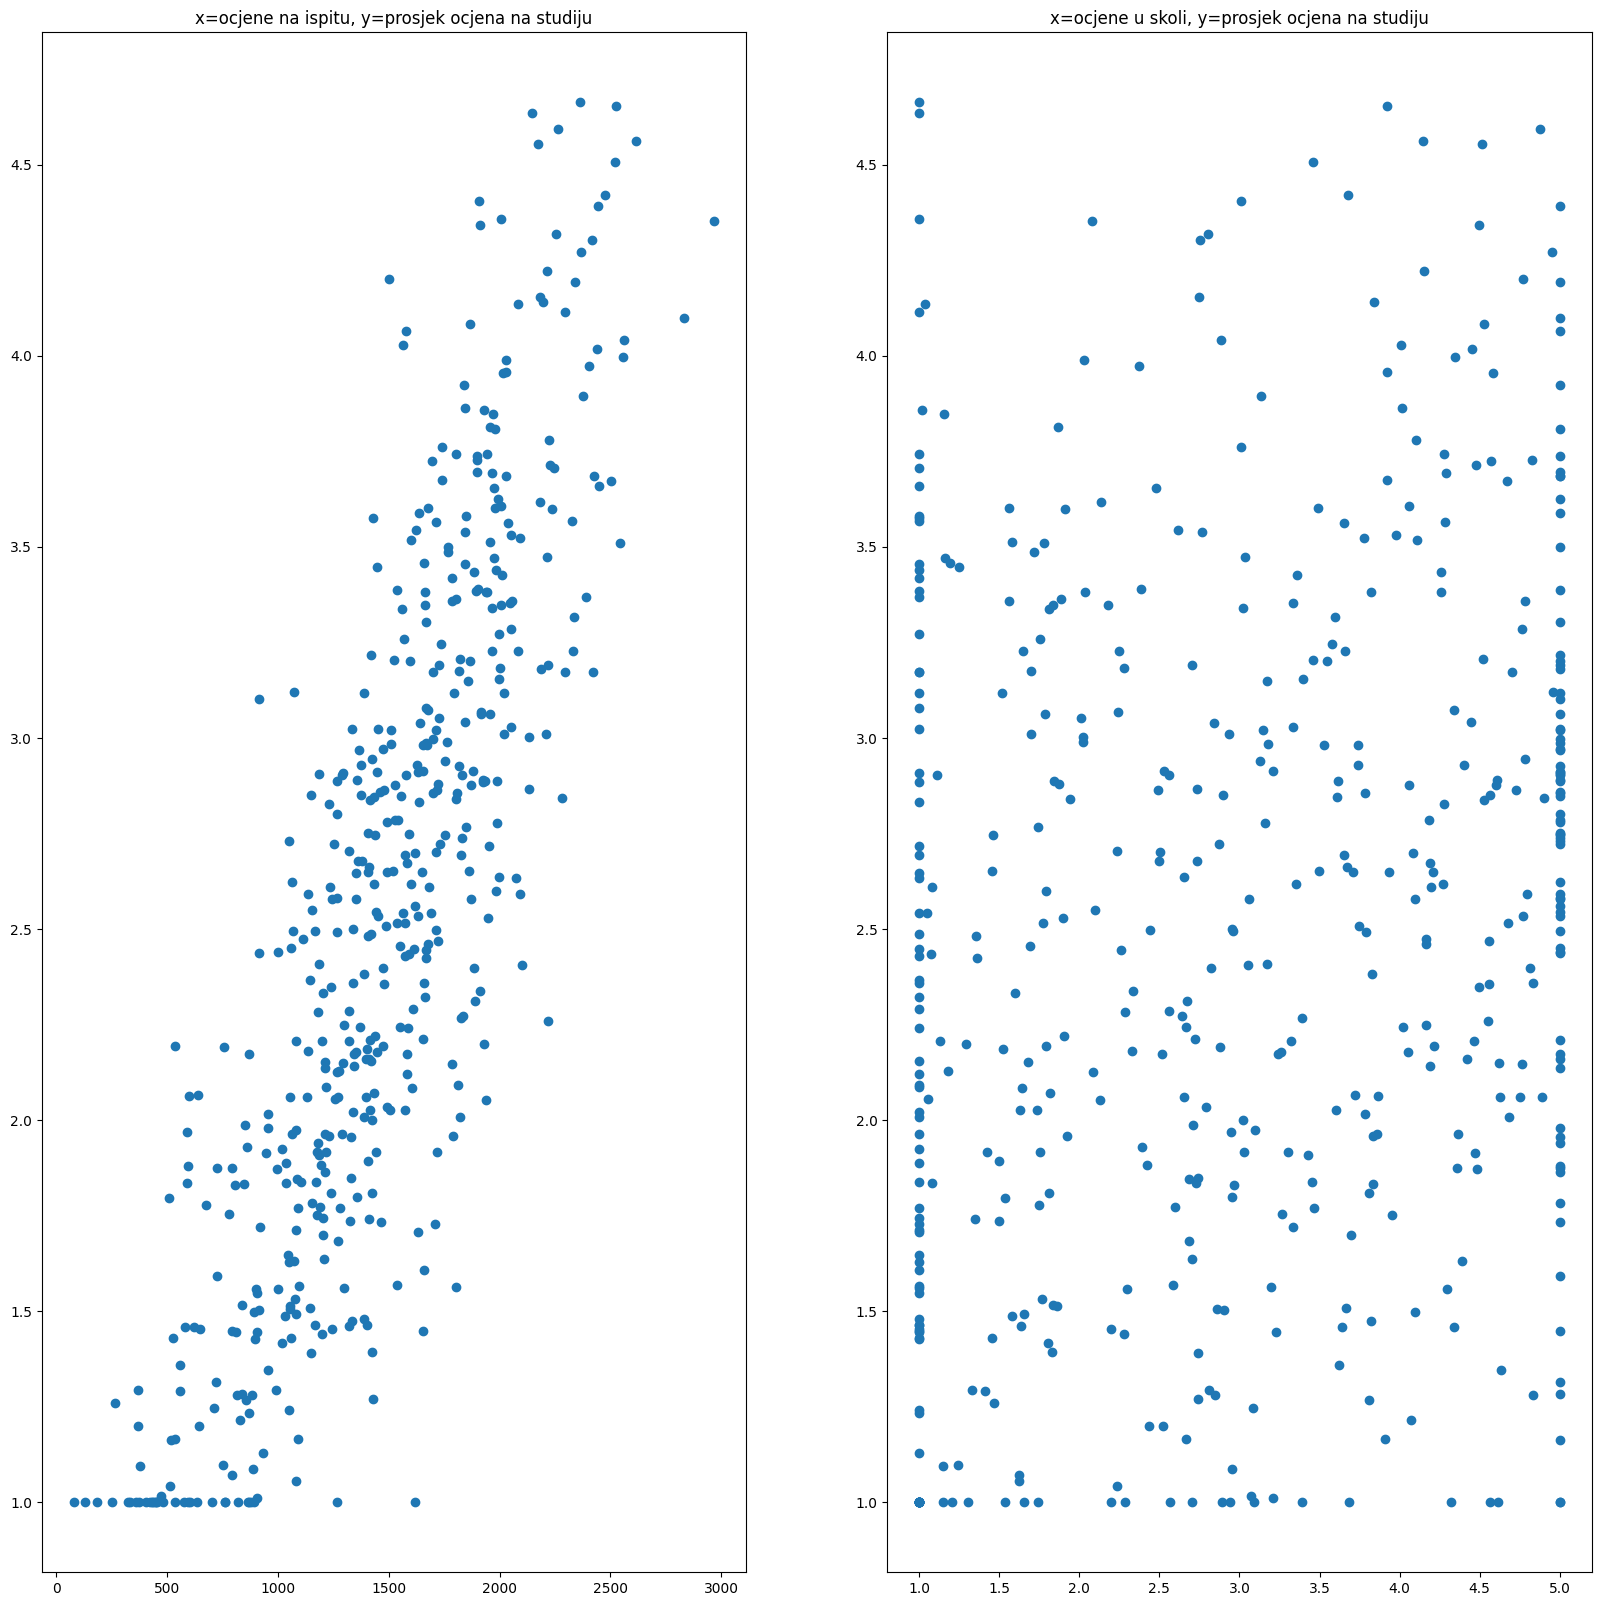

In [29]:
# Vaš kôd ovdje
figure, axs = subplots(1,2)
figure.set_size_inches(20, 20)

axs[0].set_title("x=ocjene na ispitu, y=prosjek ocjena na studiju")
axs[0].scatter(exam_score, grades_y)

axs[1].set_title("x=ocjene u skoli, y=prosjek ocjena na studiju")
axs[1].scatter(grade_in_highschool, grades_y)


### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [30]:
# Vaš kôd ovdje

alpha = 0.01

#x_design = PolynomialFeatures(degree=5).fit_transform(grades_X)
ridge = Ridge(alpha)
ridge.fit(grades_X, grades_y)
y_pred = np.matmul(grades_X, np.transpose(ridge.coef_))
mse = mean_squared_error(grades_y, y_pred)
print(ridge.coef_)


[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [31]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

scaler_x = StandardScaler()
scaler_y = StandardScaler()
grades_X_fixed = scaler_x.fit_transform(grades_X)
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

alpha = 0.01

#x_design = PolynomialFeatures(degree=5).fit_transform(grades_X)
ridge = Ridge(alpha)
ridge.fit(grades_X_fixed, grades_y_fixed)
y_pred = np.matmul(grades_X_fixed, np.transpose(ridge.coef_))
mse = mean_squared_error(grades_y_fixed, y_pred)
print(ridge.coef_)


[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
# Vaš kôd ovdje
stupac = grades_X_fixed[:,-1].reshape(-1,1)
grades_X_fixed_colinear = np.hstack((grades_X_fixed, stupac))


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
# Vaš kôd ovdje
alpha = 0.01

ridge = Ridge(alpha)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
y_pred = np.matmul(grades_X_fixed_colinear, np.transpose(ridge.coef_))
mse = mean_squared_error(grades_y_fixed, y_pred)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [42]:
# Vaš kôd ovdje


def std_devs(a):
    a = np.array(a)
    a1 = a[:, 0]
    a2 = a[:, 1]
    a3 = a[:, 2]
    std_dev_a1 = np.std(a1)
    std_dev_a2 = np.std(a2)
    std_dev_a3 = np.std(a3)
    return [std_dev_a1, std_dev_a2, std_dev_a3]


l1, l2 = [], []
for i in range(10):
    num_rows = grades_X_fixed_colinear.shape[0] // 2
    rows_sampled = np.random.choice(grades_X_fixed_colinear.shape[0], num_rows, replace=False)
    matrix_50_percent = grades_X_fixed_colinear[rows_sampled, :]
    matrix_y = grades_y_fixed[rows_sampled, :]


    ridge = Ridge(alpha=0.01)
    ridge.fit(matrix_50_percent, matrix_y)
    y_pred = np.matmul(matrix_50_percent, np.transpose(ridge.coef_))
    #print(f"Dobiveni vektor za lambda == 0.01, iteracija: {i}, tezina: {ridge.coef_}")
    l1.append(ridge.coef_[0])
    

    ridge = Ridge(alpha=1000)
    ridge.fit(matrix_50_percent, matrix_y)
    y_pred = np.matmul(matrix_50_percent, np.transpose(ridge.coef_))
    #print(f"Dobiveni vektor za lambda == 1000, iteracija: {i}, tezina: {ridge.coef_}")
    l2.append(ridge.coef_[0])

print(f"Standardna devijacija za tezine w1, w2, w3 za lambda= 0.01: {std_devs(l1)}")
print(f"Standardna devijacija za tezine w1, w2, w3 za lambda= 1000: {std_devs(l2)}")
    

Standardna devijacija za tezine w1, w2, w3 za lambda= 0.01: [0.02047357200567942, 0.012399076050003819, 0.01239907604988161]
Standardna devijacija za tezine w1, w2, w3 za lambda= 1000: [0.004739581083583895, 0.0059593267164488595, 0.005959326716448864]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.